<a href="https://colab.research.google.com/github/kiri182/DataScience/blob/main/coin__multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install Historic-Crypto

In [ ]:
# Retrieve BTC/USD dataset
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies
from Historic_Crypto import LiveCryptoData

df = HistoricalData('BTC-USD',86400,'2021-01-01-00-00').retrieve_data()

In [ ]:
import pandas as pd

# Add day column by weekday of DatetimeIndex attribute
# 0: Monday - 6: Sunday
df['day'] = df.index.weekday

In [40]:
# Calculate RSI(Relative Strength Index:相対力指数)
# (A / (A + B) ) * 100
# A: Total increase for 14 days / B: Total decrease for 14 days

# Difference from the previous day
df['diff'] = df['close'].diff()

# Check the value
df_up, df_down = df['diff'].copy(), df['diff'].copy()
df_up[df_up < 0] = 0      # Assign 0 if less than 0
df_down[df_down > 0] = 0  # Assign 0 if greater than 0

# Calculate the average of the 14-day increase
df_up_14 = df_up.rolling(window = 14, center = False).mean()
# Calculate the average of the 14-day decrease
df_down_14 = abs(df_down.rolling(window = 14, center = False).mean())

# Assign RSI
df['rsi'] = (df_up_14 / (df_up_14 + df_down_14)) * 100


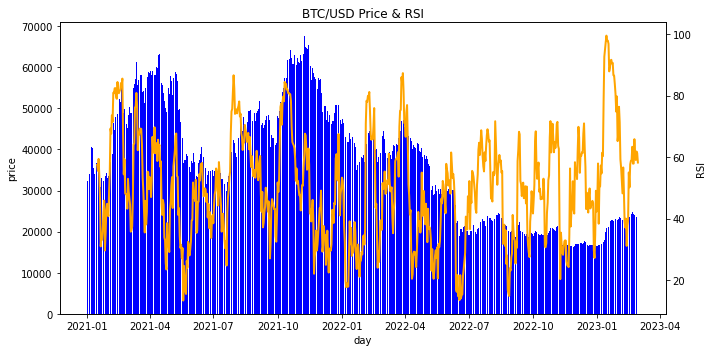

,low,high,open,close,volume,day,diff,rsi
time,,,,,,,,
2021-01-02,29039.00,33300.00,29413.29,32225.91,46675.246521,5,NaN,NaN
2021-01-03,32008.62,34810.00,32222.88,33080.66,36951.716506,6,854.75,NaN
2021-01-04,27678.00,33666.99,33082.84,32019.99,46045.389685,0,-1060.67,NaN
2021-01-05,29891.13,34499.67,32020.22,34030.64,42282.569200,1,2010.65,NaN
2021-01-06,33352.54,37000.00,34043.91,36859.26,45744.103200,2,2828.62,NaN


In [41]:
# Visualize the data set
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.title(r'BTC/USD Price & RSI')
plt.rcParams['figure.figsize'] = (10 ,5)

c1,c2 = "blue","orange"  
l1,l2 = "BTC/USD","RSI"

ax1.set_xlabel('day')
ax1.set_ylabel('price')
ax2.set_ylabel('RSI')

ax1.bar(df.index, df['close'], color=c1, label=l1)
ax2.plot(df.index, df['rsi'], color=c2, label=l2, linewidth=2)

fig.tight_layout()
plt.show()
df.head()

In [42]:
# Pre-process for missing values

# Find missing valuies from each angle
print(df.isnull().any())
print(df.isnull().any(axis=1))

# Replace the missing value with a value of next data
df.fillna(method='bfill', inplace=True)

# Assing zero to diff of 1st row
df.loc['2021-01-02', 'diff'] = 0

low       False
high      False
open      False
close     False
volume    False
day       False
diff       True
rsi        True
dtype: bool
time
2021-01-02     True
2021-01-03     True
2021-01-04     True
2021-01-05     True
2021-01-06     True
              ...  
2023-02-24    False
2023-02-25    False
2023-02-26    False
2023-02-27    False
2023-02-28    False
Length: 788, dtype: bool


In [125]:
# Check data set again
df.head(20)

,low,high,open,close,volume,day,diff,rsi
time,,,,,,,,
2021-01-02,29039.00,33300.00,29413.29,32225.91,46675.246521,5,0.00,57.445578
2021-01-03,32008.62,34810.00,32222.88,33080.66,36951.716506,6,854.75,57.445578
2021-01-04,27678.00,33666.99,33082.84,32019.99,46045.389685,0,-1060.67,57.445578
2021-01-05,29891.13,34499.67,32020.22,34030.64,42282.569200,1,2010.65,57.445578
2021-01-06,33352.54,37000.00,34043.91,36859.26,45744.103200,2,2828.62,57.445578
2021-01-07,36200.00,40425.00,36859.26,39505.56,50346.305691,3,2646.30,57.445578
2021-01-08,36565.08,41986.37,39510.55,40665.15,48522.484903,4,1159.59,57.445578
2021-01-09,38800.00,41406.94,40642.15,40257.43,27152.971029,5,-407.72,57.445578
2021-01-10,34444.00,41452.12,40257.43,38171.57,43736.570316,6,-2085.86,57.445578


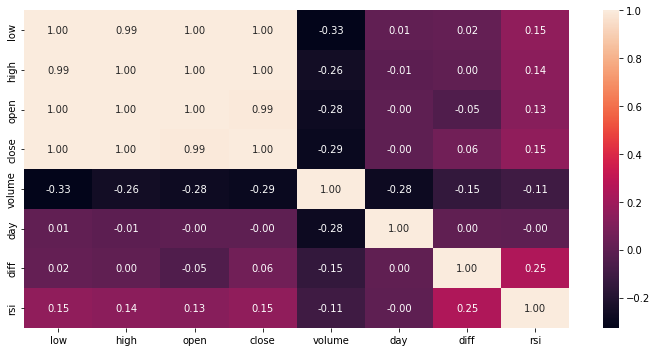

In [44]:
# Check correlation of data set just beacuse.
import numpy as np
import seaborn as sns

corr = np.corrcoef(df.values.T)

m   = sns.heatmap(
                 corr,                         
                 annot=True,                   
                 fmt='.2f',                    
                 annot_kws={'size': 10},       
                 yticklabels=list(df.columns), 
                 xticklabels=list(df.columns)) 

plt.tight_layout()
plt.show()

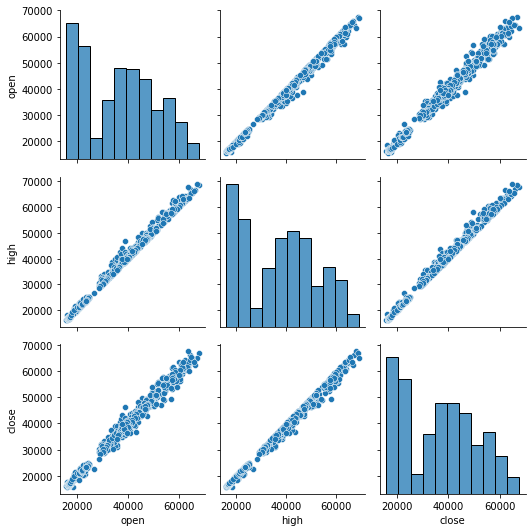

In [150]:
# Visualize the objective variable ('close') and the four selected variables as a scatter plot
sns.pairplot(df[['open', 'high', 'close']])
plt.tight_layout()
plt.show()



In [179]:
# Multi-regression analysis

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# No Standardization code
X = df[['open', 'high']].values              # Explanatory variable
y = df['close'].values                              # Objective variable
'''
# Standardization
sc = StandardScaler()
X = df.loc[:, ['open', 'high']]              # Explanatory variable
y = df['close'].values                              # Objective variable
X = sc.fit_transform(X)
'''

# Divide the data set into training data set and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

LinearRegression()

In [180]:
# Predicted value with train data
y_train_pred = model_multi.predict(X_train)

# Predicted value with test data
y_test_pred  = model_multi.predict(X_test)

       open     high
0 -0.195774  1.16043
Intercept: 131.53


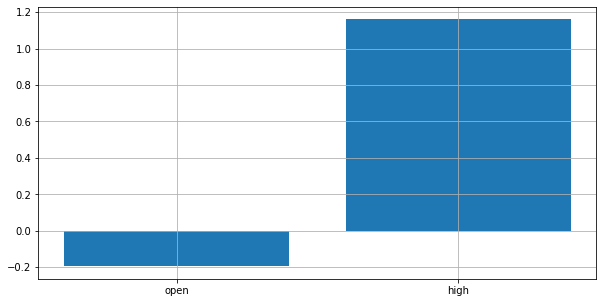

In [181]:
df_coef = pd.DataFrame(model_multi.coef_.reshape(1,2), 
                       columns=['open', 'high'])
print(df_coef)

print('Intercept: %.2f' % model_multi.intercept_)

num = len(df_coef.columns)

plt.bar(df_coef.columns, model_multi.coef_)
plt.xticks(np.arange(num), df_coef.columns)
plt.grid()
plt.show()

In [182]:
from sklearn.metrics import r2_score            # R^2
from sklearn.metrics import mean_squared_error  # RMSE

# RMSE:平均平方二乗誤差
print('RMSE Train: %.2f, Test: %.2f' % (
        mean_squared_error(y_train, y_train_pred, squared=False), 
        mean_squared_error(y_test, y_test_pred, squared=False)    
      ))

# R^2:決定係数
print('R^2 Train: %.2f, Test: %.2f' % (
        r2_score(y_train, y_train_pred), 
        r2_score(y_test, y_test_pred)    
      ))


RMSE Train: 999.46, Test: 918.71
R^2 Train: 0.99, Test: 1.00


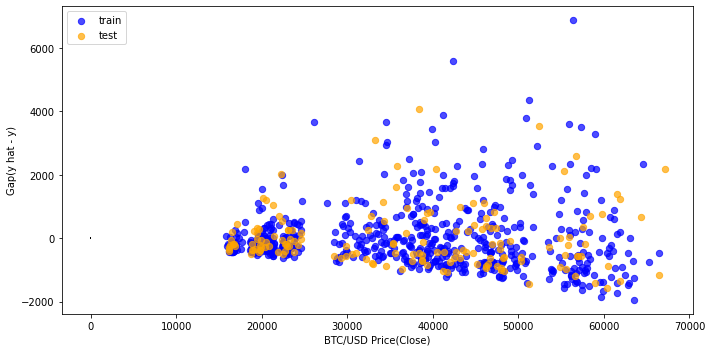

In [183]:
# Plot predictions and gap with the train data
plt.scatter(y_train_pred,             # x-axis value of graph (predicted value)
            y_train_pred - y_train,   # y-axis value of graph (gap y hat - y)
            c='blue',                 
            marker='o',               
            s=40,                     
            alpha=0.7,                
            label='train')         


# Plot predictions and gap with the test data
plt.scatter(y_test_pred,            
            y_test_pred - y_test, 
            c='orange',
            marker='o', 
            s=40,
            alpha=0.7,
            label='test')

plt.xlabel('BTC/USD Price(Close)')
plt.ylabel('Gap(y hat - y)')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-20, xmax=60, lw=2, color='black')
plt.tight_layout()
plt.show()

In [196]:
# BTC/USD at Feb 21, 2023
# open 24,833.05
# high 25,126.85
# close 24,436.35
# source https://finance.yahoo.com/quote/BTC-USD/history/

open = 24833.05
high = 25126.85	
close = 24436.35

y_test_pred  = model_multi.predict([[open, high]])
print('Residual：{:.2f}'.format(close - float(y_test_pred)))

Residual：8.54
